### refrence :https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

### We usually start with K-Means clustering. After going through several tutorials and Medium stories you will be able to implement k-means clustering easily. But as you implement it, a question starts to bug your mind: how can we measure its goodness of fit? Supervised algorithms have lots of metrics to check their goodness of fit like accuracy, r-square value, sensitivity, specificity etc. but what can we calculate to measure the accuracy or goodness of our clustering technique? The answer to this question is Silhouette Coefficient or Silhouette score.

### Silhouette Coefficient:
### Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.
### 1: Means clusters are well apart from each other and clearly distinguished.
### 0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.
### -1: Means clusters are assigned in the wrong way.

### Silhouette Score = (b-a)/max(a,b)
### where
### a= average intra-cluster distance i.e the average distance between each point within a cluster.
### b= average inter-cluster distance i.e the average distance between all clusters.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline


In [3]:
X= np.random.rand(50,2)
Y= 2 + np.random.rand(50,2)
Z= np.concatenate((X,Y))
Z=pd.DataFrame(Z) #converting into data frame for ease

C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

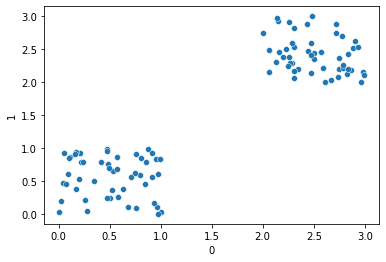

In [5]:
sns.scatterplot(Z[0],Z[1])


In [6]:
KMean= KMeans(n_clusters=2)
KMean.fit(Z)
label=KMean.predict(Z)

In [7]:
print(f'Silhouette Score(n=2): {silhouette_score(Z, label)}')


Silhouette Score(n=2): 0.8031503709005715


### Output: Silhouette Score(n=2): 0.8062146115881652
We can say that the clusters are well apart from each other as the silhouette score is closer to 1.
To check whether our silhouette score is providing the right information or not let’s create another scatter plot showing labelled data points

Silhouette Score(n=3): 0.5832911064956245


C:\Users\Zigron\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0', ylabel='1'>

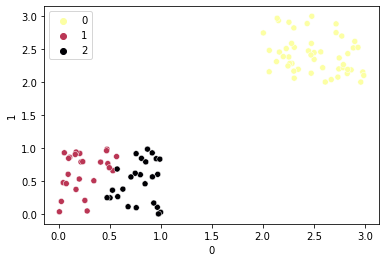

In [14]:
KMean= KMeans(n_clusters=3)
KMean.fit(Z)
label=KMean.predict(Z)
print(f'Silhouette Score(n=3): {silhouette_score(Z, label)}')
sns.scatterplot(Z[0],Z[1],hue=label,palette='inferno_r')

### As you can see in the above figure clusters are not well apart. The inter cluster distance between cluster 1 and cluster 2 is almost negligible. That is why the silhouette score for n= 3(0.596) is lesser than that of n=2(0.806).
When dealing with higher dimensions, the silhouette score is quite useful to validate the working of clustering algorithm as we can’t use any type of visualization to validate clustering when dimensions are greater than 3.
We can also use the silhouette score to check the optimal number of clusters. In the above example, we can say that the optimal number of clusters is 2 as its silhouette score is greater than that of 3 clusters.

### refrence 2 : https://www.analyticsvidhya.com/blog/2021/05/k-mean-getting-the-optimal-number-of-clusters/

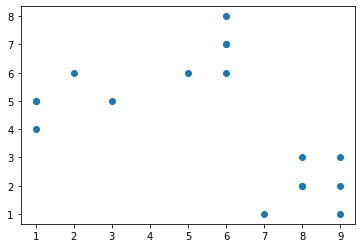

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
X1 = [3, 1, 1, 2, 1, 6, 6, 6, 5, 6, 7, 8, 9, 8, 9, 9, 8]
X2 = [5, 4, 5, 6, 5, 8, 6, 7, 6, 7, 1, 2, 1, 2, 3, 2, 3]
plt.scatter(X1,X2)
plt.show()
Z= np.concatenate((X1,X2))
data_frame=pd.DataFrame(Z) #

C:\Users\Zigron\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


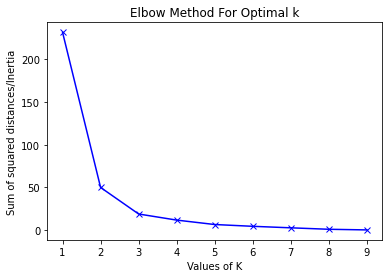

In [19]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(data_frame)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()